# Problem Sheet 4



In this problem sheet, you are expected to apply the neural network to predict the price of sp500 by using indices of other important world economic entities. You will need to 

- Get some experience on tensorflow 
- Understand the interaction between different markets
- Implement some neural network models to predict 


#### Suppose Bob is a speculator in the stock market, who would like to try a strategy based on several different world's principle entities' indices, and that 

- Bob can only trade on sp500
- Bob will mainly take Japan, Germany, UK, France, and Hong Kong SAR of China as the main benchmark references.  
- Bob only consult the **closed price** of each day.

### Question 1 
Find out the principle index of US, Japan, Germany, UK, France, and Hong Kong SAR of China. For example, 
* US: SP500
* Japan: ? 
* Germany: ? 
* UK: ? 
* France: ? 
* Hong Kong SAR of China: ? 



In [ ]:
# Japan: N225
# Germany: DAX30
# UK: FTSE
# France: CAC40
# Hong Kong SAR of China: HSI

### Question 2
- Import the indices' price datas as pandas Dataframe into your notebook, from the source dataset: https://www.kaggle.com/rohitktiwari04/top-10-stock-indices, name this data frame as "all indices".


In [1]:
import pandas as pd

In [2]:
def load_data(df_name):
    path = './data/' + df_name + '.csv'
    df = pd.read_csv(path)
    df["Date"] = pd.to_datetime(df["Date"])
    df = df.set_index("Date").sort_values(by="Date")
    for name in df.columns:
        df = df.rename(columns={name: (df_name + "_" + name)})
    return df

In [3]:
CAC = load_data('CAC')
CAC

,CAC_Open,CAC_High,CAC_Low,CAC_Close,CAC_Adj Close,CAC_Volume
Date,,,,,,
2007-01-02,5575.759766,5621.649902,5575.629883,5617.709961,5617.709961,85910000.0
2007-01-03,5621.000000,5623.669922,5596.819824,5610.919922,5610.919922,118580700.0
2007-01-04,5573.729980,5585.540039,5547.169922,5574.560059,5574.560059,130465700.0
2007-01-05,5552.640137,5566.240234,5517.350098,5517.350098,5517.350098,126420500.0
2007-01-08,5532.569824,5555.669922,5509.060059,5518.589844,5518.589844,115053800.0
...,...,...,...,...,...,...
2021-06-25,6637.680176,6641.899902,6604.859863,6622.870117,6622.870117,0.0
2021-06-28,6611.990234,6633.729980,6556.879883,6558.020020,6558.020020,63796100.0
2021-06-29,6564.069824,6599.879883,6561.089844,6567.430176,6567.430176,61812500.0


In [4]:
DAX = load_data('DAX')
DAX

,DAX_Open,DAX_High,DAX_Low,DAX_Close,DAX_Adj Close,DAX_Volume
Date,,,,,,
2007-01-02,6614.729980,6682.810059,6614.729980,6681.129883,6681.129883,70947800.0
2007-01-03,6681.229980,6704.040039,6667.580078,6691.319824,6691.319824,105913800.0
2007-01-04,6662.240234,6684.109863,6634.740234,6674.399902,6674.399902,143461600.0
2007-01-05,6661.899902,6665.509766,6588.029785,6593.089844,6593.089844,142562500.0
2007-01-08,6603.549805,6628.359863,6579.899902,6607.589844,6607.589844,116670200.0
...,...,...,...,...,...,...
2021-06-25,15584.900391,15612.660156,15533.400391,15607.969727,15607.969727,46613700.0
2021-06-28,15570.799805,15668.080078,15542.169922,15554.179688,15554.179688,43947600.0
2021-06-29,15565.830078,15752.929688,15555.490234,15690.589844,15690.589844,50284300.0


In [5]:
Dow_Jones = load_data('Dow Jones')
Dow_Jones

,Dow Jones_ Open,Dow Jones_ High,Dow Jones_ Low,Dow Jones_ Close
Date,,,,
2007-01-03,12459.54,12630.34,12373.82,12474.52
2007-01-04,12473.16,12560.96,12357.56,12480.69
2007-01-05,12480.05,12504.40,12326.79,12398.01
2007-01-08,12392.01,12489.50,12298.59,12423.49
2007-01-09,12424.77,12516.66,12337.85,12416.60
...,...,...,...,...
2021-06-25,34328.10,34501.02,34314.80,34433.84
2021-06-28,34428.10,34449.65,34186.13,34283.27
2021-06-29,34338.89,34469.83,34266.83,34292.29


In [6]:
FTSE = load_data('FTSE')
FTSE

,FTSE_Open,FTSE_High,FTSE_Low,FTSE_Close,FTSE_Adj Close,FTSE_Volume
Date,,,,,,
2020-04-24,5826.600098,5827.200195,5728.799805,5752.200195,5752.200195,8.088216e+08
2020-04-27,5752.200195,5855.600098,5752.200195,5846.799805,5846.799805,7.922464e+08
2020-04-28,5846.799805,5977.799805,5835.899902,5958.500000,5958.500000,1.196851e+09
2020-04-29,5958.500000,6129.600098,5950.799805,6115.299805,6115.299805,1.288097e+09
2020-04-30,6115.299805,6151.600098,5897.899902,5901.200195,5901.200195,1.933349e+09
...,...,...,...,...,...,...
2021-06-25,7110.000000,7139.100098,7109.799805,7136.100098,7136.100098,6.090384e+08
2021-06-28,7136.100098,7136.200195,7072.000000,7073.000000,7073.000000,6.825319e+08
2021-06-29,7073.000000,7120.799805,7071.899902,7087.600098,7087.600098,5.310154e+08


In [7]:
HSI = load_data('Hang Seng')
HSI

,Hang Seng_Open,Hang Seng_High,Hang Seng_Low,Hang Seng_Close,Hang Seng_Adj Close,Hang Seng_Volume
Date,,,,,,
2007-01-02,20004.839844,20323.589844,19990.279297,20310.179688,20310.179688,1.264597e+09
2007-01-03,20353.419922,20554.580078,20249.609375,20413.390625,20413.390625,1.673969e+09
2007-01-04,20415.669922,20463.179688,19948.019531,20025.580078,20025.580078,2.130510e+09
2007-01-05,19890.150391,20213.640625,19757.240234,20211.279297,20211.279297,1.959114e+09
2007-01-08,19915.000000,20085.580078,19844.310547,20029.660156,20029.660156,1.438589e+09
...,...,...,...,...,...,...
2021-06-24,28865.460938,28993.369141,28782.339844,28882.460938,28882.460938,1.723216e+09
2021-06-25,29002.669922,29305.169922,28971.599609,29288.220703,29288.220703,2.149434e+09
2021-06-28,29366.490234,29394.689453,29209.429688,29268.300781,29268.300781,1.512611e+09


In [8]:
Kospi = load_data('Kospi')
Kospi

,Kospi_Open,Kospi_High,Kospi_Low,Kospi_Close,Kospi_Adj Close,Kospi_Volume
Date,,,,,,
2007-01-02,1438.890015,1439.709961,1430.060059,1435.260010,1435.260010,147700.0
2007-01-03,1436.420044,1437.790039,1409.310059,1409.349976,1409.349976,203200.0
2007-01-04,1410.550049,1411.119995,1388.500000,1397.290039,1397.290039,241200.0
2007-01-05,1398.599976,1400.589966,1372.359985,1385.760010,1385.760010,277300.0
2007-01-08,1376.760010,1384.650024,1366.479980,1370.810059,1370.810059,177600.0
...,...,...,...,...,...,...
2021-06-28,3305.459961,3311.689941,3291.300049,3301.889893,3301.889893,1427400.0
2021-06-29,3305.260010,3305.419922,3276.629883,3286.679932,3286.679932,1211800.0
2021-06-30,3288.629883,3305.729980,3288.629883,3296.679932,3296.679932,1608900.0


In [9]:
Nasdaq = load_data('Nasdaq')
Nasdaq

,Nasdaq_Open,Nasdaq_High,Nasdaq_Low,Nasdaq_Close,Nasdaq_Adj Close,Nasdaq_Volume
Date,,,,,,
2001-01-02,2474.159912,2474.159912,2273.070068,2291.860107,2291.860107,1918930000
2001-01-03,2254.560059,2618.030029,2251.709961,2616.689941,2616.689941,3188000000
2001-01-04,2593.959961,2644.800049,2549.830078,2566.830078,2566.830078,2610680000
2001-01-05,2573.110107,2574.620117,2395.389893,2407.649902,2407.649902,2104670000
2001-01-08,2388.719971,2397.060059,2299.649902,2395.919922,2395.919922,1850590000
...,...,...,...,...,...,...
2021-06-25,14400.809570,14409.080078,14337.650391,14360.389648,14360.389648,7436800000
2021-06-28,14417.809570,14505.190430,14417.200195,14500.509766,14500.509766,4235620000
2021-06-29,14509.190430,14535.969727,14471.379883,14528.330078,14528.330078,4842860000


In [10]:
Nifty50 = load_data('Nifty50')
Nifty50

,Nifty50_Open,Nifty50_High,Nifty50_Low,Nifty50_Close,Nifty50_Adj Close,Nifty50_Volume
Date,,,,,,
2007-09-17,4518.450195,4549.049805,4482.850098,4494.649902,4494.649902,0.0
2007-09-18,4494.100098,4551.799805,4481.549805,4546.200195,4546.200195,0.0
2007-09-19,4550.250000,4739.000000,4550.250000,4732.350098,4732.350098,0.0
2007-09-20,4734.850098,4760.850098,4721.149902,4747.549805,4747.549805,0.0
2007-09-21,4752.950195,4855.700195,4733.700195,4837.549805,4837.549805,0.0
...,...,...,...,...,...,...
2021-06-25,15839.349609,15870.799805,15772.299805,15860.349609,15860.349609,314600.0
2021-06-28,15915.349609,15915.650391,15792.150391,15814.700195,15814.700195,255100.0
2021-06-29,15807.500000,15835.900391,15724.049805,15748.450195,15748.450195,360300.0


In [11]:
N225 = load_data('Nikkei 225')
N225

,Nikkei 225_Open,Nikkei 225_High,Nikkei 225_Low,Nikkei 225_Close,Nikkei 225_Adj Close,Nikkei 225_Volume
Date,,,,,,
2007-01-04,17322.500000,17379.460938,17315.759766,17353.669922,17353.669922,80100000.0
2007-01-05,17315.539063,17327.130859,17011.099609,17091.589844,17091.589844,158600000.0
2007-01-09,17018.890625,17261.029297,16983.970703,17237.769531,17237.769531,142400000.0
2007-01-10,17192.419922,17199.419922,16847.570313,16942.400391,16942.400391,133500000.0
2007-01-11,16958.570313,17057.449219,16758.460938,16838.169922,16838.169922,121900000.0
...,...,...,...,...,...,...
2021-06-28,29112.660156,29121.279297,28984.929688,29048.019531,29048.019531,47700000.0
2021-06-29,28927.439453,28951.679688,28735.550781,28812.609375,28812.609375,59700000.0
2021-06-30,28896.310547,28998.990234,28779.759766,28791.529297,28791.529297,54000000.0


In [12]:
SSE = load_data('SSE')
SSE

,SSE_Open,SSE_High,SSE_Low,SSE_Close,SSE_Adj Close,SSE_Volume
Date,,,,,,
2007-01-04,2728.187988,2847.614990,2684.818115,2715.718994,2715.718994,120200.0
2007-01-05,2668.576904,2685.803955,2617.019043,2641.333984,2641.333984,106200.0
2007-01-08,2621.068115,2708.444092,2620.625000,2707.198975,2707.198975,106800.0
2007-01-09,2711.049072,2809.394043,2691.360107,2807.803955,2807.803955,110800.0
2007-01-10,2838.113037,2841.740967,2770.988037,2825.575928,2825.575928,111800.0
...,...,...,...,...,...,...
2021-06-25,3567.379883,3614.300049,3564.520020,3607.560059,3607.560059,346100.0
2021-06-28,3612.250000,3614.360107,3594.219971,3606.370117,3606.370117,321300.0
2021-06-29,3601.679932,3601.830078,3570.530029,3573.179932,3573.179932,306100.0


In [13]:
allIndices = Nasdaq.join(DAX).join(Dow_Jones).join(FTSE).join(HSI).join(
    Kospi).join(CAC).join(Nifty50).join(N225).join(SSE)
allIndices

,Nasdaq_Open,Nasdaq_High,Nasdaq_Low,Nasdaq_Close,Nasdaq_Adj Close,Nasdaq_Volume,DAX_Open,DAX_High,DAX_Low,DAX_Close,...,Nikkei 225_Low,Nikkei 225_Close,Nikkei 225_Adj Close,Nikkei 225_Volume,SSE_Open,SSE_High,SSE_Low,SSE_Close,SSE_Adj Close,SSE_Volume
Date,,,,,,,,,,,,,,,,,,,,,
2001-01-02,2474.159912,2474.159912,2273.070068,2291.860107,2291.860107,1918930000,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2001-01-03,2254.560059,2618.030029,2251.709961,2616.689941,2616.689941,3188000000,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2001-01-04,2593.959961,2644.800049,2549.830078,2566.830078,2566.830078,2610680000,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2001-01-05,2573.110107,2574.620117,2395.389893,2407.649902,2407.649902,2104670000,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2001-01-08,2388.719971,2397.060059,2299.649902,2395.919922,2395.919922,1850590000,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-06-25,14400.809570,14409.080078,14337.650391,14360.389648,14360.389648,7436800000,15584.900391,15612.660156,15533.400391,15607.969727,...,28992.740234,29066.179688,29066.179688,51600000.0,3567.379883,3614.300049,3564.520020,3607.560059,3607.560059,346100.0
2021-06-28,14417.809570,14505.190430,14417.200195,14500.509766,14500.509766,4235620000,15570.799805,15668.080078,15542.169922,15554.179688,...,28984.929688,29048.019531,29048.019531,47700000.0,3612.250000,3614.360107,3594.219971,3606.370117,3606.370117,321300.0
2021-06-29,14509.190430,14535.969727,14471.379883,14528.330078,14528.330078,4842860000,15565.830078,15752.929688,15555.490234,15690.589844,...,28735.550781,28812.609375,28812.609375,59700000.0,3601.679932,3601.830078,3570.530029,3573.179932,3573.179932,306100.0


### Question 3 
- Extract the data for the above indices. For each day n, associate the logdiff, i.e., log P_{n}- log P_{n-1}, which can be seen as the increments. Here P_{n} is the price of day n. 


In [14]:
import math
import numpy as np

In [15]:
def logdiff(df, col_name):
    x = df[col_name].astype("float")
    z = list()
    for n in range(len(x)):
        if n == 0:
            z.append(np.nan)
            n += 1
        else:
            z.append(math.log(x[n]) - math.log(x[n - 1]))
    df[(col_name + "_logdiff")] = z

In [16]:
allIndices_c = allIndices.copy()
allIndices_c

,Nasdaq_Open,Nasdaq_High,Nasdaq_Low,Nasdaq_Close,Nasdaq_Adj Close,Nasdaq_Volume,DAX_Open,DAX_High,DAX_Low,DAX_Close,...,Nikkei 225_Low,Nikkei 225_Close,Nikkei 225_Adj Close,Nikkei 225_Volume,SSE_Open,SSE_High,SSE_Low,SSE_Close,SSE_Adj Close,SSE_Volume
Date,,,,,,,,,,,,,,,,,,,,,
2001-01-02,2474.159912,2474.159912,2273.070068,2291.860107,2291.860107,1918930000,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2001-01-03,2254.560059,2618.030029,2251.709961,2616.689941,2616.689941,3188000000,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2001-01-04,2593.959961,2644.800049,2549.830078,2566.830078,2566.830078,2610680000,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2001-01-05,2573.110107,2574.620117,2395.389893,2407.649902,2407.649902,2104670000,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2001-01-08,2388.719971,2397.060059,2299.649902,2395.919922,2395.919922,1850590000,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-06-25,14400.809570,14409.080078,14337.650391,14360.389648,14360.389648,7436800000,15584.900391,15612.660156,15533.400391,15607.969727,...,28992.740234,29066.179688,29066.179688,51600000.0,3567.379883,3614.300049,3564.520020,3607.560059,3607.560059,346100.0
2021-06-28,14417.809570,14505.190430,14417.200195,14500.509766,14500.509766,4235620000,15570.799805,15668.080078,15542.169922,15554.179688,...,28984.929688,29048.019531,29048.019531,47700000.0,3612.250000,3614.360107,3594.219971,3606.370117,3606.370117,321300.0
2021-06-29,14509.190430,14535.969727,14471.379883,14528.330078,14528.330078,4842860000,15565.830078,15752.929688,15555.490234,15690.589844,...,28735.550781,28812.609375,28812.609375,59700000.0,3601.679932,3601.830078,3570.530029,3573.179932,3573.179932,306100.0


In [17]:
# logdiff(allIndices_c,'DAX_Volume')
# allIndices_c.iloc[:,-1]

ValueError: math domain error

In [18]:
# allIndices_c[allIndices_c['DAX_Volume'].isin([0.0])].DAX_Volume

Date
2018-04-27    0.0
2018-07-06    0.0
2018-07-13    0.0
2018-08-10    0.0
2018-09-11    0.0
2018-09-24    0.0
2018-10-10    0.0
2018-10-25    0.0
2018-11-06    0.0
Name: DAX_Volume, dtype: float64

In [17]:
# In order to avoid "ValueError: math domain error"(0.0)
allIndices = allIndices.replace(0.0, np.nan)
allIndices

,Nasdaq_Open,Nasdaq_High,Nasdaq_Low,Nasdaq_Close,Nasdaq_Adj Close,Nasdaq_Volume,DAX_Open,DAX_High,DAX_Low,DAX_Close,...,Nikkei 225_Low,Nikkei 225_Close,Nikkei 225_Adj Close,Nikkei 225_Volume,SSE_Open,SSE_High,SSE_Low,SSE_Close,SSE_Adj Close,SSE_Volume
Date,,,,,,,,,,,,,,,,,,,,,
2001-01-02,2474.159912,2474.159912,2273.070068,2291.860107,2291.860107,1918930000,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2001-01-03,2254.560059,2618.030029,2251.709961,2616.689941,2616.689941,3188000000,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2001-01-04,2593.959961,2644.800049,2549.830078,2566.830078,2566.830078,2610680000,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2001-01-05,2573.110107,2574.620117,2395.389893,2407.649902,2407.649902,2104670000,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2001-01-08,2388.719971,2397.060059,2299.649902,2395.919922,2395.919922,1850590000,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-06-25,14400.809570,14409.080078,14337.650391,14360.389648,14360.389648,7436800000,15584.900391,15612.660156,15533.400391,15607.969727,...,28992.740234,29066.179688,29066.179688,51600000.0,3567.379883,3614.300049,3564.520020,3607.560059,3607.560059,346100.0
2021-06-28,14417.809570,14505.190430,14417.200195,14500.509766,14500.509766,4235620000,15570.799805,15668.080078,15542.169922,15554.179688,...,28984.929688,29048.019531,29048.019531,47700000.0,3612.250000,3614.360107,3594.219971,3606.370117,3606.370117,321300.0
2021-06-29,14509.190430,14535.969727,14471.379883,14528.330078,14528.330078,4842860000,15565.830078,15752.929688,15555.490234,15690.589844,...,28735.550781,28812.609375,28812.609375,59700000.0,3601.679932,3601.830078,3570.530029,3573.179932,3573.179932,306100.0


In [18]:
for n in allIndices.columns:
    logdiff(allIndices, n)

In [19]:
allIndices

,Nasdaq_Open,Nasdaq_High,Nasdaq_Low,Nasdaq_Close,Nasdaq_Adj Close,Nasdaq_Volume,DAX_Open,DAX_High,DAX_Low,DAX_Close,...,Nikkei 225_Low_logdiff,Nikkei 225_Close_logdiff,Nikkei 225_Adj Close_logdiff,Nikkei 225_Volume_logdiff,SSE_Open_logdiff,SSE_High_logdiff,SSE_Low_logdiff,SSE_Close_logdiff,SSE_Adj Close_logdiff,SSE_Volume_logdiff
Date,,,,,,,,,,,,,,,,,,,,,
2001-01-02,2474.159912,2474.159912,2273.070068,2291.860107,2291.860107,1918930000,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2001-01-03,2254.560059,2618.030029,2251.709961,2616.689941,2616.689941,3188000000,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2001-01-04,2593.959961,2644.800049,2549.830078,2566.830078,2566.830078,2610680000,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2001-01-05,2573.110107,2574.620117,2395.389893,2407.649902,2407.649902,2104670000,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2001-01-08,2388.719971,2397.060059,2299.649902,2395.919922,2395.919922,1850590000,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-06-25,14400.809570,14409.080078,14337.650391,14360.389648,14360.389648,7436800000,15584.900391,15612.660156,15533.400391,15607.969727,...,0.008117,0.006591,0.006591,0.145788,-0.000336,0.012195,0.004414,0.011405,0.011405,0.031404
2021-06-28,14417.809570,14505.190430,14417.200195,14500.509766,14500.509766,4235620000,15570.799805,15668.080078,15542.169922,15554.179688,...,-0.000269,-0.000625,-0.000625,-0.078590,0.012499,0.000017,0.008298,-0.000330,-0.000330,-0.074352
2021-06-29,14509.190430,14535.969727,14471.379883,14528.330078,14528.330078,4842860000,15565.830078,15752.929688,15555.490234,15690.589844,...,-0.008641,-0.008137,-0.008137,0.224401,-0.002930,-0.003473,-0.006613,-0.009246,-0.009246,-0.048463


In [20]:
allIndices_log = allIndices.iloc[:, 58:]
allIndices_log

,Nasdaq_Open_logdiff,Nasdaq_High_logdiff,Nasdaq_Low_logdiff,Nasdaq_Close_logdiff,Nasdaq_Adj Close_logdiff,Nasdaq_Volume_logdiff,DAX_Open_logdiff,DAX_High_logdiff,DAX_Low_logdiff,DAX_Close_logdiff,...,Nikkei 225_Low_logdiff,Nikkei 225_Close_logdiff,Nikkei 225_Adj Close_logdiff,Nikkei 225_Volume_logdiff,SSE_Open_logdiff,SSE_High_logdiff,SSE_Low_logdiff,SSE_Close_logdiff,SSE_Adj Close_logdiff,SSE_Volume_logdiff
Date,,,,,,,,,,,,,,,,,,,,,
2001-01-02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2001-01-03,-0.092946,0.056521,-0.009441,0.132546,0.132546,0.507626,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2001-01-04,0.140231,0.010173,0.124337,-0.019238,-0.019238,-0.199783,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2001-01-05,-0.008070,-0.026893,-0.062481,-0.064021,-0.064021,-0.215452,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2001-01-08,-0.074358,-0.071459,-0.040789,-0.004884,-0.004884,-0.128654,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-06-25,0.003028,-0.000373,0.000276,-0.000649,-0.000649,0.548458,0.003622,0.000370,0.003659,0.001201,...,0.008117,0.006591,0.006591,0.145788,-0.000336,0.012195,0.004414,0.011405,0.011405,0.031404
2021-06-28,0.001180,0.006648,0.005533,0.009710,0.009710,-0.562911,-0.000905,0.003543,0.000564,-0.003452,...,-0.000269,-0.000625,-0.000625,-0.078590,0.012499,0.000017,0.008298,-0.000330,-0.000330,-0.074352
2021-06-29,0.006318,0.002120,0.003751,0.001917,0.001917,0.133976,-0.000319,0.005401,0.000857,0.008732,...,-0.008641,-0.008137,-0.008137,0.224401,-0.002930,-0.003473,-0.006613,-0.009246,-0.009246,-0.048463


### Question 4 
- Take the logdiff of US as the output value, and logdiffs of other 5 indices as input. Do some EDA.

In [22]:
import pandas_datareader.data as pdr

sp500 = pdr.DataReader(name='^GSPC',
                       data_source='yahoo',
                       start='2007-01-02',
                       end='2021-07-02')
sp500

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2007-01-03,1429.420044,1407.859985,1418.030029,1416.599976,3429160000,1416.599976
2007-01-04,1421.839966,1408.430054,1416.599976,1418.339966,3004460000,1418.339966
2007-01-05,1418.339966,1405.750000,1418.339966,1409.709961,2919400000,1409.709961
2007-01-08,1414.979980,1403.969971,1409.260010,1412.839966,2763340000,1412.839966
2007-01-09,1415.609985,1405.420044,1412.839966,1412.109985,3038380000,1412.109985
...,...,...,...,...,...,...
2021-06-28,4292.140137,4274.669922,4284.899902,4290.609863,3415610000,4290.609863
2021-06-29,4300.520020,4287.040039,4293.209961,4291.799805,3049560000,4291.799805
2021-06-30,4302.430176,4287.959961,4290.649902,4297.500000,3687880000,4297.500000


In [23]:
for name in sp500.columns:
    sp500 = sp500.rename(columns={name: ("SP500_" + name)})
sp500

,SP500_High,SP500_Low,SP500_Open,SP500_Close,SP500_Volume,SP500_Adj Close
Date,,,,,,
2007-01-03,1429.420044,1407.859985,1418.030029,1416.599976,3429160000,1416.599976
2007-01-04,1421.839966,1408.430054,1416.599976,1418.339966,3004460000,1418.339966
2007-01-05,1418.339966,1405.750000,1418.339966,1409.709961,2919400000,1409.709961
2007-01-08,1414.979980,1403.969971,1409.260010,1412.839966,2763340000,1412.839966
2007-01-09,1415.609985,1405.420044,1412.839966,1412.109985,3038380000,1412.109985
...,...,...,...,...,...,...
2021-06-28,4292.140137,4274.669922,4284.899902,4290.609863,3415610000,4290.609863
2021-06-29,4300.520020,4287.040039,4293.209961,4291.799805,3049560000,4291.799805
2021-06-30,4302.430176,4287.959961,4290.649902,4297.500000,3687880000,4297.500000


In [24]:
all_data = sp500.join(DAX).join(N225).join(FTSE).join(CAC).join(HSI).replace(0.0, np.nan)
for n in all_data.columns:
    logdiff(all_data, n)
all_data

,SP500_High,SP500_Low,SP500_Open,SP500_Close,SP500_Volume,SP500_Adj Close,DAX_Open,DAX_High,DAX_Low,DAX_Close,...,CAC_Low_logdiff,CAC_Close_logdiff,CAC_Adj Close_logdiff,CAC_Volume_logdiff,Hang Seng_Open_logdiff,Hang Seng_High_logdiff,Hang Seng_Low_logdiff,Hang Seng_Close_logdiff,Hang Seng_Adj Close_logdiff,Hang Seng_Volume_logdiff
Date,,,,,,,,,,,,,,,,,,,,,
2007-01-03,1429.420044,1407.859985,1418.030029,1416.599976,3429160000,1416.599976,6681.229980,6704.040039,6667.580078,6691.319824,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2007-01-04,1421.839966,1408.430054,1416.599976,1418.339966,3004460000,1418.339966,6662.240234,6684.109863,6634.740234,6674.399902,...,-0.008911,-0.006501,-0.006501,0.095517,0.003054,-0.004457,-0.015006,-0.019181,-0.019181,0.241164
2007-01-05,1418.339966,1405.750000,1418.339966,1409.709961,2919400000,1409.709961,6661.899902,6665.509766,6588.029785,6593.089844,...,-0.005390,-0.010316,-0.010316,-0.031497,-0.026078,-0.012270,-0.009610,0.009230,0.009230,-0.083869
2007-01-08,1414.979980,1403.969971,1409.260010,1412.839966,2763340000,1412.839966,6603.549805,6628.359863,6579.899902,6607.589844,...,-0.001504,0.000225,0.000225,-0.094214,0.001249,-0.006356,0.004397,-0.009027,-0.009027,-0.308830
2007-01-09,1415.609985,1405.420044,1412.839966,1412.109985,3038380000,1412.109985,6625.279785,6665.910156,6606.870117,6614.370117,...,0.004267,0.002613,0.002613,0.276427,0.012353,0.004346,-0.002524,-0.006591,-0.006591,0.057946
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-06-28,4292.140137,4274.669922,4284.899902,4290.609863,3415610000,4290.609863,15570.799805,15668.080078,15542.169922,15554.179688,...,-0.007291,-0.009840,-0.009840,NaN,0.012466,0.003050,0.008176,-0.000680,-0.000680,-0.351367
2021-06-29,4300.520020,4287.040039,4293.209961,4291.799805,3049560000,4291.799805,15565.830078,15752.929688,15555.490234,15690.589844,...,0.000642,0.001434,0.001434,-0.031586,-0.002544,-0.003503,-0.009799,-0.009413,-0.009413,0.443343
2021-06-30,4302.430176,4287.959961,4290.649902,4297.500000,3687880000,4297.500000,15700.059570,15709.339844,15461.200195,15531.040039,...,-0.013296,-0.009117,-0.009117,0.362076,-0.006301,-0.004983,-0.003356,-0.005747,-0.005747,-0.138607


In [25]:
all_data1 = all_data.iloc[1:, 36:].filter(like='_Close', axis=1)
all_data1

,SP500_Close_logdiff,DAX_Close_logdiff,Nikkei 225_Close_logdiff,FTSE_Close_logdiff,CAC_Close_logdiff,Hang Seng_Close_logdiff
Date,,,,,,
2007-01-04,0.001228,-0.002532,NaN,NaN,-0.006501,-0.019181
2007-01-05,-0.006103,-0.012257,-0.015217,NaN,-0.010316,0.009230
2007-01-08,0.002218,0.002197,NaN,NaN,0.000225,-0.009027
2007-01-09,-0.000517,0.001026,NaN,NaN,0.002613,-0.006591
2007-01-10,0.001938,-0.007254,-0.017284,NaN,-0.005633,-0.016710
...,...,...,...,...,...,...
2021-06-28,0.002312,-0.003452,-0.000625,-0.008882,-0.009840,-0.000680
2021-06-29,0.000277,0.008732,-0.008137,0.002062,0.001434,-0.009413
2021-06-30,0.001327,-0.010221,-0.000732,-0.007094,-0.009117,-0.005747


In [26]:
from sklearn.impute import SimpleImputer

all_data1_imput = SimpleImputer().fit_transform(all_data1)
all_data1_imput

array([[ 1.22753250e-03, -2.53183987e-03,  2.70936616e-05,
         6.86102482e-04, -6.50128401e-03, -1.91806285e-02],
       [-6.10316783e-03, -1.22571907e-02, -1.52174864e-02,
         6.86102482e-04, -1.03157107e-02,  9.23036938e-03],
       [ 2.21785708e-03,  2.19685746e-03,  2.70936616e-05,
         6.86102482e-04,  2.24674294e-04, -9.02664683e-03],
       ...,
       [ 1.32727842e-03, -1.02205551e-02, -7.31894597e-04,
        -7.09379866e-03, -9.11653147e-03, -5.74697198e-03],
       [ 5.20804143e-03,  4.67448306e-03, -2.93886604e-03,
         1.23848298e-02,  7.04197960e-03,  7.96753830e-05],
       [ 7.47209589e-03,  1.82369034e-04,  2.65228236e-03,
         6.86102482e-04,  1.13352801e-05,  7.96753830e-05]])

In [27]:
X = all_data1_imput[:,1:]
X

array([[-2.53183987e-03,  2.70936616e-05,  6.86102482e-04,
        -6.50128401e-03, -1.91806285e-02],
       [-1.22571907e-02, -1.52174864e-02,  6.86102482e-04,
        -1.03157107e-02,  9.23036938e-03],
       [ 2.19685746e-03,  2.70936616e-05,  6.86102482e-04,
         2.24674294e-04, -9.02664683e-03],
       ...,
       [-1.02205551e-02, -7.31894597e-04, -7.09379866e-03,
        -9.11653147e-03, -5.74697198e-03],
       [ 4.67448306e-03, -2.93886604e-03,  1.23848298e-02,
         7.04197960e-03,  7.96753830e-05],
       [ 1.82369034e-04,  2.65228236e-03,  6.86102482e-04,
         1.13352801e-05,  7.96753830e-05]])

In [28]:
y = all_data1_imput[:,0]
y

array([ 0.00122753, -0.00610317,  0.00221786, ...,  0.00132728,
        0.00520804,  0.0074721 ])

In [29]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size=0.1,
                                                    random_state=42)

### Question 5

Construct a MLP with only 1 hidden layer(with 100 neurons). Train the model with 30 epochs, report the result. Compare the performance on the training set and validation set, conclude that 
- whether the result is improving with more epochs
- whether there exists overfitting


In [31]:
import tensorflow as tf
from tensorflow import keras

np.random.seed(42)
tf.random.set_seed(42)

In [32]:
model_q5 = keras.models.Sequential([
    keras.layers.Dense(100, activation='relu', input_shape=X_train.shape[1:]),
    keras.layers.Dense(1)
])

In [35]:
model_q5.compile(loss='mean_absolute_error',
                 optimizer='adam',
                 metrics=['mean_squared_error'])

In [36]:
history5_1 = model_q5.fit(X_train,
                          y_train,
                          epochs=30,
                          batch_size=1,
                          verbose=1,
                          validation_split=0.2)

Epoch 1/30
2628/2628 [==============================] - 2s 582us/step - loss: 0.0072 - mean_squared_error: 1.1477e-04 - val_loss: 0.0067 - val_mean_squared_error: 1.1619e-04
Epoch 2/30
2628/2628 [==============================] - 1s 549us/step - loss: 0.0069 - mean_squared_error: 1.0844e-04 - val_loss: 0.0070 - val_mean_squared_error: 1.1545e-04
Epoch 3/30
2628/2628 [==============================] - 1s 556us/step - loss: 0.0070 - mean_squared_error: 1.1032e-04 - val_loss: 0.0067 - val_mean_squared_error: 1.1372e-04
Epoch 4/30
2628/2628 [==============================] - 1s 561us/step - loss: 0.0068 - mean_squared_error: 1.0456e-04 - val_loss: 0.0070 - val_mean_squared_error: 1.1953e-04
Epoch 5/30
2628/2628 [==============================] - 1s 558us/step - loss: 0.0067 - mean_squared_error: 1.0474e-04 - val_loss: 0.0066 - val_mean_squared_error: 1.0917e-04
Epoch 6/30
2628/2628 [==============================] - 1s 562us/step - loss: 0.0068 - mean_squared_error: 1.0461e-04 - val_loss: 

In [37]:
history5_2 = model_q5.fit(X_train,
                          y_train,
                          epochs=50,
                          batch_size=1,
                          verbose=1,
                          validation_split=0.2)

Epoch 1/50
2628/2628 [==============================] - 2s 571us/step - loss: 0.0066 - mean_squared_error: 9.9903e-05 - val_loss: 0.0068 - val_mean_squared_error: 1.1520e-04
Epoch 2/50
2628/2628 [==============================] - 1s 554us/step - loss: 0.0066 - mean_squared_error: 1.0114e-04 - val_loss: 0.0071 - val_mean_squared_error: 1.1668e-04
Epoch 3/50
2628/2628 [==============================] - 1s 562us/step - loss: 0.0067 - mean_squared_error: 1.0169e-04 - val_loss: 0.0066 - val_mean_squared_error: 1.0961e-04
Epoch 4/50
2628/2628 [==============================] - 2s 577us/step - loss: 0.0067 - mean_squared_error: 1.0281e-04 - val_loss: 0.0067 - val_mean_squared_error: 1.1055e-04
Epoch 5/50
2628/2628 [==============================] - 1s 564us/step - loss: 0.0066 - mean_squared_error: 1.0071e-04 - val_loss: 0.0069 - val_mean_squared_error: 1.1208e-04
Epoch 6/50
2628/2628 [==============================] - 1s 564us/step - loss: 0.0066 - mean_squared_error: 1.0127e-04 - val_loss: 

Epoch 48/50
2628/2628 [==============================] - 2s 572us/step - loss: 0.0066 - mean_squared_error: 9.9984e-05 - val_loss: 0.0068 - val_mean_squared_error: 1.1174e-04
Epoch 49/50
2628/2628 [==============================] - 1s 542us/step - loss: 0.0066 - mean_squared_error: 1.0075e-04 - val_loss: 0.0073 - val_mean_squared_error: 1.1913e-04
Epoch 50/50
2628/2628 [==============================] - 1s 561us/step - loss: 0.0066 - mean_squared_error: 1.0048e-04 - val_loss: 0.0087 - val_mean_squared_error: 1.4601e-04


In [38]:
history5_3 = model_q5.fit(X_train,
                          y_train,
                          epochs=100,
                          batch_size=1,
                          verbose=1,
                          validation_split=0.2)

Epoch 1/100
2628/2628 [==============================] - 2s 574us/step - loss: 0.0066 - mean_squared_error: 9.9228e-05 - val_loss: 0.0066 - val_mean_squared_error: 1.0991e-04
Epoch 2/100
2628/2628 [==============================] - 1s 558us/step - loss: 0.0066 - mean_squared_error: 9.9561e-05 - val_loss: 0.0068 - val_mean_squared_error: 1.0978e-04
Epoch 3/100
2628/2628 [==============================] - 2s 577us/step - loss: 0.0066 - mean_squared_error: 1.0052e-04 - val_loss: 0.0066 - val_mean_squared_error: 1.0810e-04
Epoch 4/100
2628/2628 [==============================] - 1s 561us/step - loss: 0.0066 - mean_squared_error: 9.9379e-05 - val_loss: 0.0066 - val_mean_squared_error: 1.1248e-04
Epoch 5/100
2628/2628 [==============================] - 1s 558us/step - loss: 0.0066 - mean_squared_error: 9.9319e-05 - val_loss: 0.0068 - val_mean_squared_error: 1.1166e-04
Epoch 6/100
2628/2628 [==============================] - 2s 571us/step - loss: 0.0066 - mean_squared_error: 1.0024e-04 - val_

2628/2628 [==============================] - 1s 557us/step - loss: 0.0066 - mean_squared_error: 9.9161e-05 - val_loss: 0.0071 - val_mean_squared_error: 1.1611e-04
Epoch 94/100
2628/2628 [==============================] - 2s 579us/step - loss: 0.0065 - mean_squared_error: 9.9852e-05 - val_loss: 0.0072 - val_mean_squared_error: 1.2165e-04
Epoch 95/100
2628/2628 [==============================] - 1s 561us/step - loss: 0.0065 - mean_squared_error: 9.8959e-05 - val_loss: 0.0066 - val_mean_squared_error: 1.0976e-04
Epoch 96/100
2628/2628 [==============================] - 1s 556us/step - loss: 0.0065 - mean_squared_error: 9.8632e-05 - val_loss: 0.0068 - val_mean_squared_error: 1.1207e-04
Epoch 97/100
2628/2628 [==============================] - 1s 563us/step - loss: 0.0066 - mean_squared_error: 9.9287e-05 - val_loss: 0.0070 - val_mean_squared_error: 1.1403e-04
Epoch 98/100
2628/2628 [==============================] - 1s 565us/step - loss: 0.0066 - mean_squared_error: 1.0065e-04 - val_loss: 0

In [ ]:
# whether the result is improving with more epochs: 
# Yes, but the improvement is very slight.

# whether there exists overfitting: Yes
# In some epochs, 'val_mean_squared_error' is much larger than 'mean_squared_error'.

### Question 6

Construct a MLP with 5 hidden layers (you decide how many neurons to put in each layer). Check the number of parameter to estimate, and print the model summary. Train your model. Save this as "my_keras_model_for_finance.h5".  Compare it with the result given by model in Question 5.

In [51]:
model_q6 = keras.models.Sequential([
    keras.layers.Dense(16, input_shape=X_train.shape[1:], activation='relu'),
    keras.layers.Dense(30, activation="relu"),
    keras.layers.Dense(18, activation="relu"),
    keras.layers.Dense(30, activation="relu"),
    keras.layers.Dense(16, activation="relu"),
    keras.layers.Dense(1)
])

In [52]:
model_q6.compile(loss='mean_absolute_error',
                 optimizer='adam',
                 metrics=['mean_squared_error'])

In [53]:
model_q6.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_14 (Dense)             (None, 16)                96        
_________________________________________________________________
dense_15 (Dense)             (None, 30)                510       
_________________________________________________________________
dense_16 (Dense)             (None, 18)                558       
_________________________________________________________________
dense_17 (Dense)             (None, 30)                570       
_________________________________________________________________
dense_18 (Dense)             (None, 16)                496       
_________________________________________________________________
dense_19 (Dense)             (None, 1)                 17        
Total params: 2,247
Trainable params: 2,247
Non-trainable params: 0
____________________________________________________

In [54]:
history6_1 = model_q6.fit(X_train,
                          y_train,
                          epochs=30,
                          batch_size=1,
                          verbose=1,
                          validation_split=0.2)

Epoch 1/30
2628/2628 [==============================] - 2s 733us/step - loss: 0.0077 - mean_squared_error: 1.4073e-04 - val_loss: 0.0067 - val_mean_squared_error: 1.1873e-04
Epoch 2/30
2628/2628 [==============================] - 2s 673us/step - loss: 0.0071 - mean_squared_error: 1.1941e-04 - val_loss: 0.0073 - val_mean_squared_error: 1.2465e-04
Epoch 3/30
2628/2628 [==============================] - 2s 669us/step - loss: 0.0072 - mean_squared_error: 1.1966e-04 - val_loss: 0.0076 - val_mean_squared_error: 1.3689e-04
Epoch 4/30
2628/2628 [==============================] - 2s 666us/step - loss: 0.0070 - mean_squared_error: 1.1192e-04 - val_loss: 0.0066 - val_mean_squared_error: 1.1362e-04
Epoch 5/30
2628/2628 [==============================] - 2s 684us/step - loss: 0.0071 - mean_squared_error: 1.1476e-04 - val_loss: 0.0067 - val_mean_squared_error: 1.1881e-04
Epoch 6/30
2628/2628 [==============================] - 2s 657us/step - loss: 0.0069 - mean_squared_error: 1.1339e-04 - val_loss: 

In [55]:
history6_2 = model_q6.fit(X_train,
                          y_train,
                          epochs=50,
                          batch_size=1,
                          verbose=1,
                          validation_split=0.2)

Epoch 1/50
2628/2628 [==============================] - 2s 689us/step - loss: 0.0068 - mean_squared_error: 1.0608e-04 - val_loss: 0.0067 - val_mean_squared_error: 1.1389e-04
Epoch 2/50
2628/2628 [==============================] - 2s 678us/step - loss: 0.0068 - mean_squared_error: 1.0660e-04 - val_loss: 0.0080 - val_mean_squared_error: 1.3804e-04
Epoch 3/50
2628/2628 [==============================] - 2s 693us/step - loss: 0.0068 - mean_squared_error: 1.0880e-04 - val_loss: 0.0067 - val_mean_squared_error: 1.1304e-04
Epoch 4/50
2628/2628 [==============================] - 2s 680us/step - loss: 0.0068 - mean_squared_error: 1.0430e-04 - val_loss: 0.0069 - val_mean_squared_error: 1.1515e-04
Epoch 5/50
2628/2628 [==============================] - 2s 675us/step - loss: 0.0068 - mean_squared_error: 1.0602e-04 - val_loss: 0.0066 - val_mean_squared_error: 1.1036e-04
Epoch 6/50
2628/2628 [==============================] - 2s 687us/step - loss: 0.0068 - mean_squared_error: 1.0584e-04 - val_loss: 

Epoch 48/50
2628/2628 [==============================] - 2s 682us/step - loss: 0.0068 - mean_squared_error: 1.0411e-04 - val_loss: 0.0067 - val_mean_squared_error: 1.1261e-04
Epoch 49/50
2628/2628 [==============================] - 2s 672us/step - loss: 0.0067 - mean_squared_error: 1.0437e-04 - val_loss: 0.0078 - val_mean_squared_error: 1.2885e-04
Epoch 50/50
2628/2628 [==============================] - 2s 682us/step - loss: 0.0067 - mean_squared_error: 1.0289e-04 - val_loss: 0.0080 - val_mean_squared_error: 1.3755e-04


In [56]:
history6_3 = model_q6.fit(X_train,
                          y_train,
                          epochs=100,
                          batch_size=1,
                          verbose=1,
                          validation_split=0.2)

Epoch 1/100
2628/2628 [==============================] - 2s 701us/step - loss: 0.0068 - mean_squared_error: 1.0603e-04 - val_loss: 0.0066 - val_mean_squared_error: 1.1163e-04
Epoch 2/100
2628/2628 [==============================] - 2s 678us/step - loss: 0.0068 - mean_squared_error: 1.0332e-04 - val_loss: 0.0070 - val_mean_squared_error: 1.1236e-04
Epoch 3/100
2628/2628 [==============================] - 2s 686us/step - loss: 0.0068 - mean_squared_error: 1.0467e-04 - val_loss: 0.0070 - val_mean_squared_error: 1.1754e-04
Epoch 4/100
2628/2628 [==============================] - 2s 683us/step - loss: 0.0067 - mean_squared_error: 1.0315e-04 - val_loss: 0.0066 - val_mean_squared_error: 1.0965e-04
Epoch 5/100
2628/2628 [==============================] - 2s 691us/step - loss: 0.0067 - mean_squared_error: 1.0434e-04 - val_loss: 0.0066 - val_mean_squared_error: 1.0822e-04
Epoch 6/100
2628/2628 [==============================] - 2s 681us/step - loss: 0.0067 - mean_squared_error: 1.0267e-04 - val_

2628/2628 [==============================] - 2s 677us/step - loss: 0.0066 - mean_squared_error: 9.9149e-05 - val_loss: 0.0084 - val_mean_squared_error: 1.3482e-04
Epoch 94/100
2628/2628 [==============================] - 2s 699us/step - loss: 0.0067 - mean_squared_error: 1.0351e-04 - val_loss: 0.0073 - val_mean_squared_error: 1.2397e-04
Epoch 95/100
2628/2628 [==============================] - 2s 690us/step - loss: 0.0066 - mean_squared_error: 1.0168e-04 - val_loss: 0.0070 - val_mean_squared_error: 1.1642e-04
Epoch 96/100
2628/2628 [==============================] - 2s 692us/step - loss: 0.0066 - mean_squared_error: 1.0013e-04 - val_loss: 0.0068 - val_mean_squared_error: 1.1200e-04
Epoch 97/100
2628/2628 [==============================] - 2s 694us/step - loss: 0.0067 - mean_squared_error: 9.9797e-05 - val_loss: 0.0068 - val_mean_squared_error: 1.1540e-04
Epoch 98/100
2628/2628 [==============================] - 2s 698us/step - loss: 0.0067 - mean_squared_error: 1.0273e-04 - val_loss: 0

In [57]:
model_q6.evaluate(X_test, y_test)

12/12 [==============================] - 0s 998us/step - loss: 0.0063 - mean_squared_error: 9.5639e-05


[0.006310821510851383, 9.563879575580359e-05]

In [58]:
model_q5.evaluate(X_test, y_test)

12/12 [==============================] - 0s 1ms/step - loss: 0.0064 - mean_squared_error: 1.0102e-04


[0.006433798465877771, 0.00010101517545990646]

In [59]:
model_q6.save('my_keras_model_for_finance.h5')

In [ ]:
# It's better than model_q5

#### Suppose Bob has changed his strategy and  would like to predict the sp500 price only based on its 30 days historical average logdiff (which you know how to calculate, as is similar to the previous homework)

In [60]:
all_data2 = all_data1.copy()
all_data2

,SP500_Close_logdiff,DAX_Close_logdiff,Nikkei 225_Close_logdiff,FTSE_Close_logdiff,CAC_Close_logdiff,Hang Seng_Close_logdiff
Date,,,,,,
2007-01-04,0.001228,-0.002532,NaN,NaN,-0.006501,-0.019181
2007-01-05,-0.006103,-0.012257,-0.015217,NaN,-0.010316,0.009230
2007-01-08,0.002218,0.002197,NaN,NaN,0.000225,-0.009027
2007-01-09,-0.000517,0.001026,NaN,NaN,0.002613,-0.006591
2007-01-10,0.001938,-0.007254,-0.017284,NaN,-0.005633,-0.016710
...,...,...,...,...,...,...
2021-06-28,0.002312,-0.003452,-0.000625,-0.008882,-0.009840,-0.000680
2021-06-29,0.000277,0.008732,-0.008137,0.002062,0.001434,-0.009413
2021-06-30,0.001327,-0.010221,-0.000732,-0.007094,-0.009117,-0.005747


In [61]:
for n in all_data2.columns:
    all_data2.loc[:, '{}_avg_{}'.format(n, 5)] = all_data2.rolling(5)[n].mean()

In [62]:
all_data3=all_data2.iloc[4:,6:]
all_data3

,SP500_Close_logdiff_avg_5,DAX_Close_logdiff_avg_5,Nikkei 225_Close_logdiff_avg_5,FTSE_Close_logdiff_avg_5,CAC_Close_logdiff_avg_5,Hang Seng_Close_logdiff_avg_5
Date,,,,,,
2007-01-10,-0.000247,-0.003764,NaN,NaN,-0.003922,-0.008456
2007-01-11,0.000771,0.000386,NaN,NaN,0.001260,-0.006498
2007-01-12,0.002960,0.003371,NaN,NaN,0.003602,-0.006005
2007-01-16,0.002680,0.003279,NaN,NaN,0.002626,-0.000017
2007-01-17,0.002605,0.002623,0.000273,NaN,0.001037,0.001666
...,...,...,...,...,...,...
2021-06-28,0.003092,-0.000630,0.007271,0.000303,-0.001353,0.005397
2021-06-29,0.002125,0.000693,-0.000496,-0.000068,-0.001338,0.004777
2021-06-30,0.002607,0.000964,-0.000578,-0.001037,-0.001324,0.000075


In [63]:
all_data3_imput = SimpleImputer().fit_transform(all_data3)
all_data3_imput

array([[-2.47223190e-04, -3.76420510e-03, -1.26614138e-04,
         5.99303366e-04, -3.92241495e-03, -8.45562851e-03],
       [ 7.71242636e-04,  3.86175630e-04, -1.26614138e-04,
         5.99303366e-04,  1.26032649e-03, -6.49836933e-03],
       [ 2.96016162e-03,  3.37135035e-03, -1.26614138e-04,
         5.99303366e-04,  3.60208344e-03, -6.00546114e-03],
       ...,
       [ 2.60727155e-03,  9.63623459e-04, -5.78231742e-04,
        -1.03744947e-03, -1.32445778e-03,  7.54889579e-05],
       [ 2.48999392e-03,  1.86953270e-04, -1.16835884e-03,
         4.27115898e-04, -2.34603389e-03,  1.63640097e-05],
       [ 3.31940047e-03,  1.26039442e-04, -1.95612994e-03,
         5.99303366e-04, -1.40656720e-05,  1.63640097e-05]])

In [103]:
x1 = all_data3_imput[:, 1:]
y1 = all_data3_imput[:, 0]
x1_train, x1_test, y1_train, y1_test = train_test_split(x1,
                                                        y1,
                                                        test_size=0.1,
                                                        random_state=42)

In [104]:
history_x1 = model_q6.fit(x1_train,
                          y1_train,
                          epochs=30,
                          batch_size=1,
                          verbose=1,
                          validation_split=0.2)

Epoch 1/30
2624/2624 [==============================] - 2s 703us/step - loss: 0.0025 - mean_squared_error: 1.1887e-05 - val_loss: 0.0021 - val_mean_squared_error: 9.5828e-06
Epoch 2/30
2624/2624 [==============================] - 2s 687us/step - loss: 0.0024 - mean_squared_error: 1.1569e-05 - val_loss: 0.0024 - val_mean_squared_error: 1.1303e-05
Epoch 3/30
2624/2624 [==============================] - 2s 684us/step - loss: 0.0024 - mean_squared_error: 1.1856e-05 - val_loss: 0.0022 - val_mean_squared_error: 9.8372e-06
Epoch 4/30
2624/2624 [==============================] - 2s 673us/step - loss: 0.0024 - mean_squared_error: 1.1638e-05 - val_loss: 0.0025 - val_mean_squared_error: 1.1318e-05
Epoch 5/30
2624/2624 [==============================] - 2s 688us/step - loss: 0.0025 - mean_squared_error: 1.1957e-05 - val_loss: 0.0021 - val_mean_squared_error: 9.2460e-06
Epoch 6/30
2624/2624 [==============================] - 2s 713us/step - loss: 0.0024 - mean_squared_error: 1.1885e-05 - val_loss: 

In [105]:
model_q6.evaluate(x1_test, y1_test)

12/12 [==============================] - 0s 1ms/step - loss: 0.0024 - mean_squared_error: 1.2077e-05


[0.0023704557679593563, 1.2077448445779737e-05]

### Question 7

Construct either a stacking LSTM model or a GRU model, and train it. Report the results. (you might want to consult the textbook chapter 15, page 514-520)

In [106]:
x2_train = x1_train.reshape((x1_train.shape[0], 1, x1_train.shape[1]))
x2_test = x1_test.reshape((x1_test.shape[0], 1, x1_test.shape[1]))
y2_train = y1_train.copy()
y2_test = y1_test.copy()

In [107]:
model = keras.models.Sequential()
model.add(
    keras.layers.LSTM(80, input_shape=(x2_train.shape[1], x2_train.shape[2])))
model.add(keras.layers.Dense(1))
model.compile(loss='mae', optimizer='adam')

In [108]:
history_lstm = model.fit(x2_train,
                         y2_train,
                         epochs=30,
                         batch_size=1,
                         validation_split=0.2,
                         verbose=1)

Epoch 1/30
2624/2624 [==============================] - 4s 991us/step - loss: 0.0027 - val_loss: 0.0021
Epoch 2/30
2624/2624 [==============================] - 2s 900us/step - loss: 0.0025 - val_loss: 0.0022
Epoch 3/30
2624/2624 [==============================] - 2s 871us/step - loss: 0.0025 - val_loss: 0.0021
Epoch 4/30
2624/2624 [==============================] - 2s 867us/step - loss: 0.0025 - val_loss: 0.0027
Epoch 5/30
2624/2624 [==============================] - 2s 869us/step - loss: 0.0025 - val_loss: 0.0022
Epoch 6/30
2624/2624 [==============================] - 2s 872us/step - loss: 0.0024 - val_loss: 0.0021
Epoch 7/30
2624/2624 [==============================] - 2s 874us/step - loss: 0.0025 - val_loss: 0.0025
Epoch 8/30
2624/2624 [==============================] - 2s 880us/step - loss: 0.0025 - val_loss: 0.0032
Epoch 9/30
2624/2624 [==============================] - 2s 865us/step - loss: 0.0024 - val_loss: 0.0022
Epoch 10/30
2624/2624 [==============================] - 2s 887u

In [109]:
model.evaluate(x2_test, y2_test)

12/12 [==============================] - 0s 1ms/step - loss: 0.0021


0.0021199011243879795

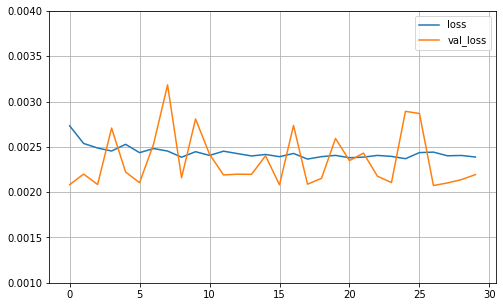

In [111]:
import matplotlib.pyplot as plt

pd.DataFrame(history_lstm.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0.001, 0.004)
plt.show()